In [3]:
import sys, os
import numpy as np
from matplotlib import pyplot as plt

In [4]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')
outpath = os.path.join(parent_dir, 'out')
mantid_path = os.path.join (parent_dir, 'mantid')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [5]:
jiao_cell = os.path.join (outpath, 'out/production-clampCell_WithSi_NoCollimator-ms-1e7-partial')
noCol = os.path.join (jiao_cell, 'sim_masked2.nxs')

jiao_colli = os.path.join (outpath, 'out/plastic_collimator-183178956')
with_Col = os.path.join (mantid_path, 'sim_small_masked.nxs') 


In [6]:
import reduce_nexasdata_using_mantid as red
import normalization_by_area as nrm

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
step = 0.01

In [13]:
binning = [0.5, step, 4.]

d_simulation_noCol, I_simulation_noCol, error_simulation_noCol = red.mantid_reduction(noCol, binning)

d_simulation_withCol, I_simulation_withCol, error_simulation_withCol = red.mantid_reduction(with_Col, binning)




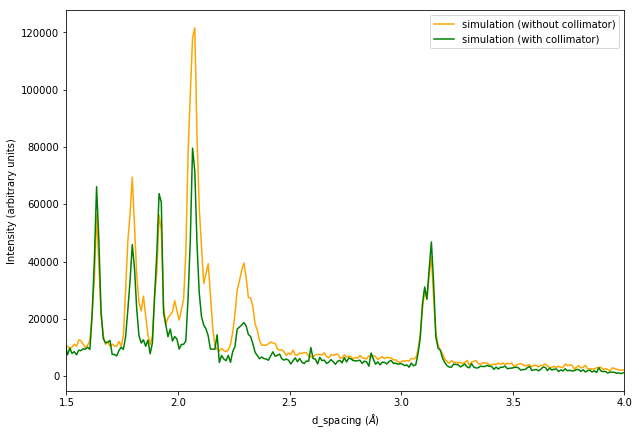

In [38]:
plt.figure(figsize=(10,7))

plt.errorbar (d_simulation_noCol,I_simulation_noCol*6.7, color='orange', label="simulation (without collimator)")



plt.errorbar (d_simulation_withCol ,I_simulation_withCol,color='green', label="simulation (with collimator)")


# plt.errorbar (d_simulation,I_simulation, color='orange', label="simulation (with collimator)")

plt.legend()
plt.xlabel('d_spacing ($\AA$)')
plt.ylabel ('Intensity (arbitrary units)')
plt.xlim (1.5,4)
plt.show()